# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary predictor with Logistic Regression.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use Logistic Regression.

- Question: Why would we want this to be a classification problem?
- Answer: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using `requests`) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)

### Write 4 functions to extract each item: location, company, job, and salary.

example: 
```python
def extract_location_from_result(result):
    return result.find ...
```


- Make sure these functions are robust and can handle cases where the data/field may not be available.
- Test the functions on the results above

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.

- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the `l=New+York` and the `start=10`. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).

#### Complete the following code to collect results from multiple cities and starting points. 
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [372]:
### Problem statement: Provide insights into the Data Science job market to find strategic 
### key words and correlations for resume optimization.
### Find: Which title is most in demand. 
### Find: Which skills are mosts requested.
### Find: Which cities/ regions need the most Data Scientists.
### Find: Which companies are hiring the most Data Scientists.

In [418]:
import pandas as pd
import numpy as np
import scipy as sp
import re
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Read in Scraped Data from Shahram the Almighty
indeed = pd.read_csv('/Users/colinjclemence/Documents/GA Projects/project-04/indeed_scrape_proj4.csv')
indeed.shape

(47987, 6)

In [399]:
#Drop all repeated job postings by filtering duplicate descriptions
#indeed = indeed.drop_duplicates('description')
#indeed.shape

(877, 6)

In [420]:
#Drop NaN from Salary Column
indeed = indeed.dropna(subset=['salary'])
indeed.shape

(7681, 6)

In [421]:
#Drop all nonnumberic characters from Salary Column
indeed['clean_salary'] = indeed['salary'].replace('\D', '', regex=True).astype(int)
indeed.head()

,Unnamed: 0,title,company,location,salary,description,clean_salary
13,13,Data Scientist,kWh Analytics,"San Francisco, CA 94104 (Financial District area)","$120,000 a year",A track record of spotting relevant trends in ...,120000
24,24,Sr Data Scientist,"eHire, LLC","Atlanta, GA 30326 (Buckhead area)","$150,000 a year",Strong background in applying statistical mach...,150000
67,67,Pivotus - Data Scientist - Palo Alto,Umpqua Bank,"Palo Alto, CA","$100,000 - $160,000 a year",You will be eager to think about how machine l...,100000160000
85,85,Data Scientist,Mesh Recruiting,"Louisville, KY 40229","$90,000 a year",Take an active role in the development of stra...,90000
98,98,Forensic Scientist - NIBIN - Firearms & Toolma...,Dept of Forensic Science,"Norfolk, VA","$44,472 a year","Upon successful completion of training, the tr...",44472


In [422]:
# Splits annual, monthly and hourly salaries
# Returns annual salary as it is
# Returns per annum projections of monthly and houlry salaries (monthly X 12; hourly x 2000)

def spliti(i):
   i = str(i)
   leni=len(i)/2#works up to here
   j=i[0:leni]
   k=i[leni:len(i)]
   j=int(j)
   k=int(k)
   average = 0.5*(j+k)
   return average

a = indeed['clean_salary']

# Annual Salary Ranges
b = a[a > 1000000]
indeed['clean_salary1'] = b.apply(lambda x: spliti(x))

# Hourly Salary Ranges
d = a[a < 300]
indeed['clean_salary2'] = d.apply(lambda x: x*2000)

# Monthly Salary Ranges
f = a[(a < 25000) & (a > 10000)]
indeed['clean_salary3'] = f.apply(lambda x: x*12)

indeed.head(20)

,Unnamed: 0,title,company,location,salary,description,clean_salary,clean_salary1,clean_salary2,clean_salary3
13,13,Data Scientist,kWh Analytics,"San Francisco, CA 94104 (Financial District area)","$120,000 a year",A track record of spotting relevant trends in ...,120000,NaN,NaN,NaN
24,24,Sr Data Scientist,"eHire, LLC","Atlanta, GA 30326 (Buckhead area)","$150,000 a year",Strong background in applying statistical mach...,150000,NaN,NaN,NaN
67,67,Pivotus - Data Scientist - Palo Alto,Umpqua Bank,"Palo Alto, CA","$100,000 - $160,000 a year",You will be eager to think about how machine l...,100000160000,130000.0,NaN,NaN
85,85,Data Scientist,Mesh Recruiting,"Louisville, KY 40229","$90,000 a year",Take an active role in the development of stra...,90000,NaN,NaN,NaN
98,98,Forensic Scientist - NIBIN - Firearms & Toolma...,Dept of Forensic Science,"Norfolk, VA","$44,472 a year","Upon successful completion of training, the tr...",44472,NaN,NaN,NaN
127,127,Mathematical Statistician,Centers for Disease Control and Prevention,"Fort Collins, CO","$76,341 - $99,243 a year",Whether we are protecting the American people ...,7634199243,87792.0,NaN,NaN
192,192,Sr. Data Scientist,"NextDeavor, Inc.","Mountain View, CA 94041","$150,000 a year",With the continuing improvement in computing r...,150000,NaN,NaN,NaN
219,219,Data Scientist (Software Engineering),Pullskill Technologies,"San Jose, CA","$120,000 a year",Data Scientist (Software Engineering) – Advanc...,120000,NaN,NaN,NaN
292,292,Mid-Level Data Scientist,Workbridge Associates,"Chicago, IL","$105,000 a year","Data, Analytics, Scientist, Science, Python, R...",105000,NaN,NaN,NaN
303,303,Data Scientist,MarkMonitor,"San Francisco Bay Area, CA","$180,000 a year",Applying machine learning to classification pr...,180000,NaN,NaN,NaN


In [423]:
# Combine 3 temporary salary columns (annual, monthly, hourly) into one column 'salary_final'

def select_sal(row):
    if row['clean_salary_all'] > 0:
       return row['clean_salary_all']
    else:
       return row['clean_salary']
   
# Take the highest value of each of the three columns return into 'clean_salary_all'
indeed['clean_salary_all'] = indeed[['clean_salary1','clean_salary2','clean_salary3']].max(axis=1)

# If a salary range is given, average the high and low salaries and return the mean as an est.
# If an annual salary is given outright return it as it is
indeed['salary_final'] = indeed.apply(select_sal, axis = 1)

# Drop all temporary columns
indeed.drop(['clean_salary', 'clean_salary1', 'clean_salary2', 'clean_salary3', 'clean_salary_all', 'salary'], inplace = True, axis = 1)

indeed

,Unnamed: 0,title,company,location,description,salary_final
13,13,Data Scientist,kWh Analytics,"San Francisco, CA 94104 (Financial District area)",A track record of spotting relevant trends in ...,120000.0
24,24,Sr Data Scientist,"eHire, LLC","Atlanta, GA 30326 (Buckhead area)",Strong background in applying statistical mach...,150000.0
67,67,Pivotus - Data Scientist - Palo Alto,Umpqua Bank,"Palo Alto, CA",You will be eager to think about how machine l...,130000.0
85,85,Data Scientist,Mesh Recruiting,"Louisville, KY 40229",Take an active role in the development of stra...,90000.0
98,98,Forensic Scientist - NIBIN - Firearms & Toolma...,Dept of Forensic Science,"Norfolk, VA","Upon successful completion of training, the tr...",44472.0
127,127,Mathematical Statistician,Centers for Disease Control and Prevention,"Fort Collins, CO",Whether we are protecting the American people ...,87792.0
192,192,Sr. Data Scientist,"NextDeavor, Inc.","Mountain View, CA 94041",With the continuing improvement in computing r...,150000.0
219,219,Data Scientist (Software Engineering),Pullskill Technologies,"San Jose, CA",Data Scientist (Software Engineering) – Advanc...,120000.0
292,292,Mid-Level Data Scientist,Workbridge Associates,"Chicago, IL","Data, Analytics, Scientist, Science, Python, R...",105000.0
303,303,Data Scientist,MarkMonitor,"San Francisco Bay Area, CA",Applying machine learning to classification pr...,180000.0


In [ ]:
# Summary statistics on salary that we will need going forward.. 
# Standard deviation to find target salaries
# We might want a 25-50-25 split of salaries. 
# The middle 50% lie between -0.68 and 0.68 standard deviations of the mean.    
# This calcluation could be used on any subset of the data we
# wish to use, including regional, by employer, etc. 

In [424]:
median = int(indeed['salary_final'].median())
mean = int(indeed['salary_final'].mean())
stdev = int(indeed['salary_final'].std())
low = mean - .68 * stdev
high = mean + .68 * stdev
print "Mean: " + str(mean)
print "Median: " + str(median)
print "StdDev: " + str(stdev)
print "High salary is above: " + str(high)
print "Low salary is below: " + str(low)

Mean: 129360
Median: 140000
StdDev: 21720
High salary is above: 144129.6
Low salary is below: 114590.4


In [425]:
# Create dummy variable for 'senior'
indeed['senior'] = False
indeed.senior = indeed['title'].str.contains('Senior|senior|Sr|sr')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.senior.fillna(value = False, inplace = True)
indeed.senior = indeed.senior.astype(int)

# Create dummy variable for 'manager'
indeed['manager'] = False
indeed.manager = indeed['title'].str.contains('Manager|manager|Mgr|mgr')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.manager.fillna(value = False, inplace = True)
indeed.manager = indeed.manager.astype(int)

# Create dummy variable for 'expert' and other upper level
indeed['expert'] = False
indeed.expert = indeed['title'].str.contains('Expert|expert|Principal|principal')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.expert.fillna(value = False, inplace = True)
indeed.expert = indeed.expert.astype(int)

# Create dummy variable for 'machine learning'
indeed['machlearn'] = False
indeed.machlearn = indeed['description'].str.contains('machine|Machine|Learning|learning')
# Fix 'NaN' which results when the desc is a 'Nan'
indeed.machlearn.fillna(value = False, inplace = True)
indeed.machlearn = indeed.machlearn.astype(int)

# Create dummy variable for 'big data'
indeed['bigdata'] = False
indeed.bigdata = indeed['description'].str.contains('Big data|big data|Big Data')
# Fix 'NaN' which results when the desc is a 'Nan'
indeed.bigdata.fillna(value = False, inplace = True)
indeed.bigdata = indeed.bigdata.astype(int)

# Create dummy variable for PHD or MS
indeed['PhDMS'] = False
indeed.PhDMS = indeed['description'].str.contains('Doctor| Dr| Doctorate| PhD| Master\'s| MS')
# Fix 'NaN' which results when the desc is a 'Nan'
indeed.PhDMS.fillna(value = False, inplace = True)
indeed.PhDMS = indeed.PhDMS.astype(int)

In [426]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import pylab as pl

cols_to_keep = ['senior', 'manager', 'expert', 'machlearn', 'bigdata', 'PhDMS', 'salary_final']
data = indeed[cols_to_keep]
data["intercept"] = 1.0
data['salary_high'] = np.where(data['salary_final'] >= mean, 1, 0)

train_cols = data.columns[0:6]

logit = sm.Logit(data["salary_high"], data[train_cols])

result = logit.fit()
result.summary2()

/Users/colinjclemence/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colinjclemence/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/colinjclemence/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


         Current function value: 0.047842
         Iterations: 35


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit             Pseudo R-squared:  0.931   
Dependent Variable:   salary_high       AIC:               746.9547
Date:                 2016-07-05 08:50  BIC:               788.6337
No. Observations:     7681              Log-Likelihood:    -367.48 
Df Model:             5                 LL-Null:           -5322.3 
Df Residuals:         7675              LLR p-value:       0.0000  
Converged:            0.0000            Scale:             1.0000  
No. Iterations:       35.0000                                      
-------------------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
-------------------------------------------------------------------
senior     0.6837     0.8606   0.7944 0.4270     -1.0031     2.3705
manager   19.5352 17458.6253   0.0011 0.9991 -34198.7416 34237.8120
expert    19.5352 17458.6253   0.0011 0.9991 -34198.7416 34237.8120
machlearn -6.1506     0.3736 -16.4613 0.0000     -6.8829    -5.4183
bigdata    0.6868     1.2196   0.5631 0.5733     -1.7036     3.0773
PhDMS      8.3717     1.0055   8.3261 0.0000      6.4010    10.3425
===================================================================

"""

In [427]:
train_cols = ['machlearn', 'bigdata']

X = data[train_cols]
Y = data.salary_final
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

logreg1 = LogisticRegression(penalty='l1')
logreg1.fit(X_train, np.asarray(Y_train, dtype=np.int64))
Y_pred = logreg1.predict(X_test)

In [429]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.33)

logreg2 = LogisticRegression(penalty='l2')
logreg2.fit(X_train2, np.asarray(Y_train2, dtype=np.int64))
Y_pred2 = logreg2.predict(X_test2)

In [431]:
from sklearn.metrics import accuracy_score
print accuracy_score(Y_test.values.astype(int), Y_pred)
print accuracy_score(Y_test2.values.astype(int), Y_pred2)

0.94201183432
0.938461538462


In [432]:
from sklearn.metrics import classification_report

print(classification_report(Y_test.values.astype(int), Y_pred))

             precision    recall  f1-score   support

       1612       0.00      0.00      0.00         1
       8125       0.00      0.00      0.00         1
       8333       0.00      0.00      0.00         1
       8541       0.00      0.00      0.00         1
      42500       0.00      0.00      0.00       122
      43200       0.00      0.00      0.00         1
      46038       0.00      0.00      0.00         1
      62500       0.00      0.00      0.00         1
      68350       0.00      0.00      0.00         1
      75000       0.00      0.00      0.00         1
      87792       0.00      0.00      0.00         1
     100000       0.00      0.00      0.00         1
     105000       0.00      0.00      0.00         1
     110000       0.00      0.00      0.00         1
     115000       0.00      0.00      0.00         1
     115285       0.00      0.00      0.00         1
     120000       0.00      0.00      0.00         1
     122500       0.00      0.00      0.00   

/Users/colinjclemence/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [433]:
indeed['SanFran'] = False
indeed.SanFran = indeed['location'].str.contains('SF|San|Francisco|Bay|Sunnyvale|Clara|Campbell| Moffett|Mountain|Palo Alto')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.SanFran.fillna(value = False, inplace = True)
indeed.SanFran = indeed.SanFran.astype(int)

indeed['NewYork'] = False
indeed.NewYor = indeed['location'].str.contains('NYC|New|York|Manhattan|NY')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.NewYork.fillna(value = False, inplace = True)
indeed.NewYork = indeed.NewYork.astype(int)

indeed['Austin'] = False
indeed.Austin = indeed['location'].str.contains('Austin|Texas|TX')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.Austin.fillna(value = False, inplace = True)
indeed.Austin = indeed.Austin.astype(int)

indeed['LA'] = False
indeed.LA = indeed['location'].str.contains('Los Angeles|Orange|LA')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.LA.fillna(value = False, inplace = True)
indeed.LA = indeed.LA.astype(int)

indeed['Chicago'] = False
indeed.Chicago = indeed['location'].str.contains('Chi|Chicago|IL|Illinois')
# Fix 'NaN' which results when the title is a 'Nan'
indeed.Chicago.fillna(value = False, inplace = True)
indeed.Chicago = indeed.Chicago.astype(int)

In [435]:
indeed.head()

,Unnamed: 0,title,company,location,description,salary_final,senior,manager,expert,machlearn,bigdata,PhDMS,SanFran,NewYork,Austin,LA,Chicago
13,13,Data Scientist,kWh Analytics,"San Francisco, CA 94104 (Financial District area)",A track record of spotting relevant trends in ...,120000.0,0,0,0,0,0,0,1,0,0,0,0
24,24,Sr Data Scientist,"eHire, LLC","Atlanta, GA 30326 (Buckhead area)",Strong background in applying statistical mach...,150000.0,1,0,0,1,0,0,0,0,0,0,0
67,67,Pivotus - Data Scientist - Palo Alto,Umpqua Bank,"Palo Alto, CA",You will be eager to think about how machine l...,130000.0,0,0,0,1,0,0,1,0,0,0,0
85,85,Data Scientist,Mesh Recruiting,"Louisville, KY 40229",Take an active role in the development of stra...,90000.0,0,0,0,0,0,0,0,0,0,0,0
98,98,Forensic Scientist - NIBIN - Firearms & Toolma...,Dept of Forensic Science,"Norfolk, VA","Upon successful completion of training, the tr...",44472.0,0,0,0,0,0,0,0,0,0,0,0


In [437]:
indeed.groupby(['SanFran, NewYork, Austin, LA, Chicago']).sum()

KeyError: 'SanFran, NewYork, Austin, LA, Chicago'

In [442]:
pd.pivot_table(data=indeed, index=['salary_final'], column=['SanFran, NewYork, Austin, LA, Chicago'], aggfunc=np.sum)

TypeError: pivot_table() got an unexpected keyword argument 'column'

In [ ]:
sns.boxplot(data=indeed,x=indeed.index, y='salary')

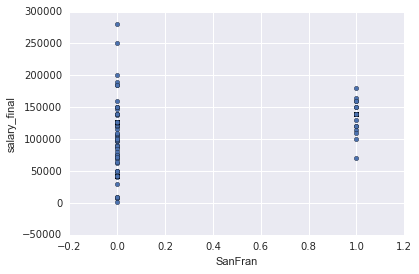

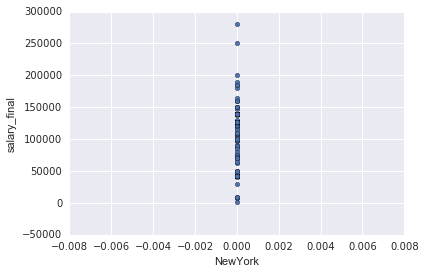

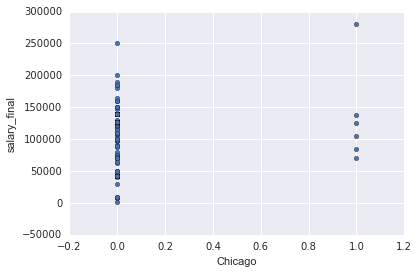

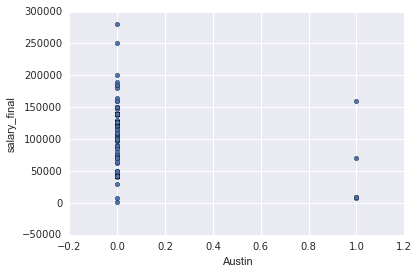

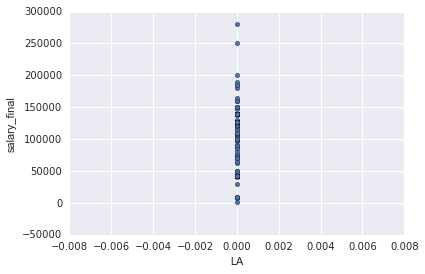

In [434]:
for name in ['SanFran', 'NewYork', 'Chicago', 'Austin', 'LA']:
    indeed.plot.scatter(x = name, y = "salary_final")

In [334]:
titles = pd.value_counts(indeed['title'])
titles = pd.DataFrame(titles)
titles.head()

,title
Data Scientist,14
Research Scientist,2
Operations Research Analyst,2
Statistician,2
Principal Statistical Analyst / Data Scientist,1


#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

In [7]:
## YOUR CODE HERE

Lastly, we need to clean up salary data. 
1. Some of the salaries are not yearly but hourly, these will be useful to us for now
2. The salaries are given as text and usually with ranges.

#### Filter out the salaries that are not yearly (filter those that refer to hour)

In [8]:
## YOUR CODE HERE

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

In [9]:
## YOUR CODE HERE

### Save your results as a CSV

In [14]:
## YOUR CODE HERE

## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [12]:
## YOUR CODE HERE
import statsmodels.api as sm
import pandas as pd
import pylab as pl
import numpy as np

dummy_ranks = pd.get_dummies(df["prestige"], prefix="prestige")
cols_to_keep = ["admit", "gre", "gpa"]
data = df[cols_to_keep].join(dummy_ranks.ix[:, "prestige_2":])
data["intercept"] = 1.0
train_cols = data.columns[1:]

logit = sm.Logit(data["admit"], data[train_cols])

result = logit.fit()
result.summary2()

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

In [15]:
## YOUR CODE HERE

#### Thought experiment: What is the baseline accuracy for this model?

In [16]:
## YOUR CODE HERE

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [17]:
## YOUR CODE HERE

#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [18]:
## YOUR CODE HERE

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [19]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [20]:
## YOUR CODE HERE

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [21]:
## YOUR CODE HERE

In [22]:
## YOUR CODE HERE

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [23]:
## YOUR CODE HERE

In [24]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [25]:
## YOUR CODE HERE